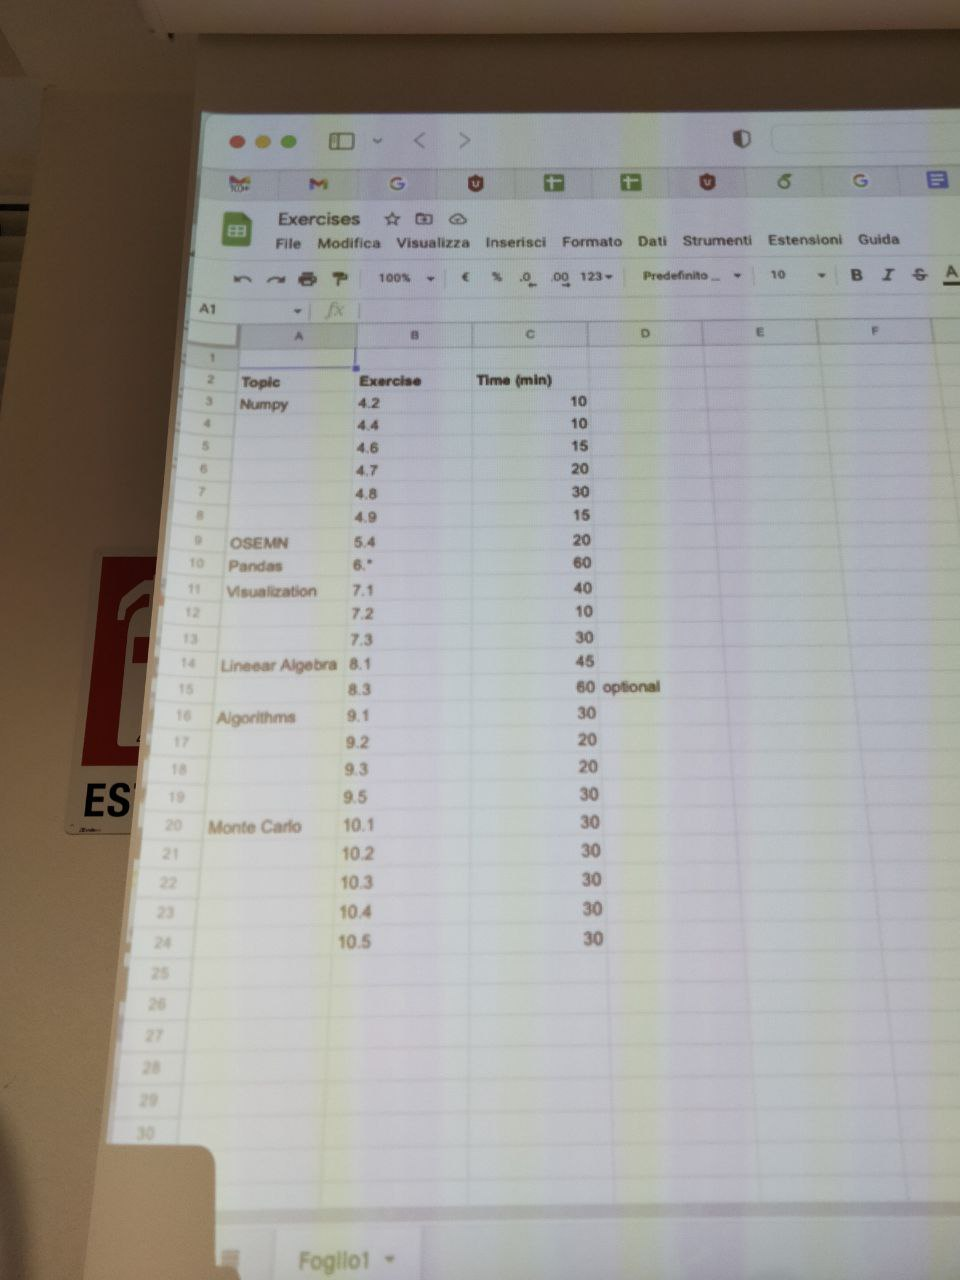

In [1]:
from IPython.display import Image
Image('ex_list_zanetti.jpg',width=500,height=500)

**Topic 4 - Numpy**:

4.2) - 10 minutes

2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
import numpy as np

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

In [3]:
# 1) Using numpy.outer():
one = np.outer(u,v)
print(one)

# 2) Using a nested for loop:
two = np.zeros((4,4),int)
for i in range(np.shape(u)[0]):
    for j in range(np.shape(v)[0]):
        two[i,j] = u[i]*v[j]
print(two) 

# 3) Using list comprehension:
three = np.array([[i*j for i in v] for j in u]).reshape(4,4)
print(three)

# 4) Using Numpy broadcasting operations:
z = np.tile(u,(4,1)).T
four = (v*z)
print(four)

# Test:
print(one == two)
print(one == three)
print(one == four)




[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


4.4) - 10 Minutes

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

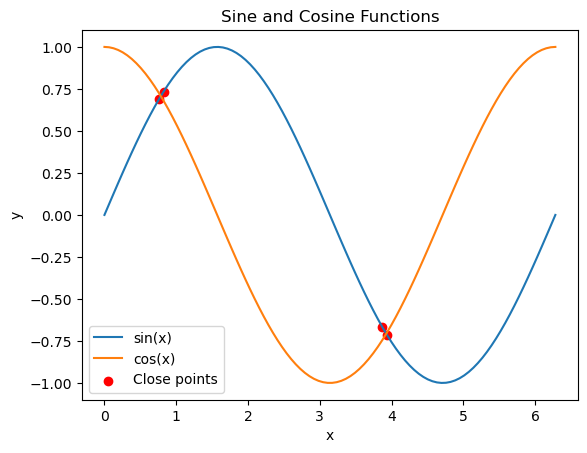

In [4]:
import matplotlib.pyplot as plt

lin = np.linspace(0,2*np.pi,100)

tenth = lin[::10]

reverse = lin[::-1]

diff = lin[np.abs(np.sin(lin)-np.cos(lin)) < 0.1]

# Make a plot showing the sin and cos functions
plt.plot(lin, np.sin(lin), label='sin(x)')
plt.plot(lin, np.cos(lin), label='cos(x)')

# Indicate where sine and cosine are close
plt.scatter(diff, np.sin(diff), color='red', label='Close points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine and Cosine Functions')
plt.legend()

# Show the plot
plt.show()


4.6) - 15 minutes

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [5]:
# City names
cities = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"]

# Corresponding positions in miles
positions_miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

# Construct a 2D grid of distances using broadcasting
distances_miles = np.abs(positions_miles[:, np.newaxis] - positions_miles)

# Convert distances to kilometers (1 mile = 1.60934 kilometers)
distances_km = distances_miles * 1.60934

# Display the 2D grid of distances in miles
print("Distances (in miles):")
print(distances_miles)

# Display the 2D grid of distances in kilometers
print("\nDistances (in kilometers):")
print(distances_km)


Distances (in miles):
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

Distances (in kilometers):
[[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1189.

4.7) - 20 minutes

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Construct a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [6]:
def primeNumbers(N):
    numbers = np.arange(N)
    
    boolArr = np.array([True]*N)


    for i in range(N):
        if i==0 or i==1 or i==2:
            continue 
        for j in range(i):
            if j==0 or j==1:
                continue
            if i%j==0:
                boolArr[i]=False
                break
            
    return (numbers[boolArr])#masking process
primeNumbers(100)   
    

array([ 0,  1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47,
       53, 59, 61, 67, 71, 73, 79, 83, 89, 97])

In [7]:
# Check performances:

%timeit primeNumbers(100)
%timeit primeNumbers(1000)
%timeit primeNumbers(10000)
    

62.3 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.07 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
227 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# With sieve of Eratosthenes:

def erat(N):
    is_prime = [True]*(N+1)
    is_prime[0] = is_prime[1] = False
    
    for num in range(2,int(N**0.5)+1):
        if is_prime[num]:
            for multiple in range(num*2,N + 1,num):
                is_prime[multiple] = False
        
    primes = [num for num in range(N+1) if is_prime[num]]    
    return primes
print(erat(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [9]:
%timeit erat(10)
%timeit erat(100)
%timeit erat(1000)

1.05 µs ± 28.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
4.46 µs ± 288 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
53.9 µs ± 4.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


4.8) - 20 minutes

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each row")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [10]:
import numpy.random as npr
import matplotlib.pyplot as plt

(1000, 200)
[[-1 -1  1 ...  1  1 -1]
 [ 1  1 -1 ... -1  1  1]
 [-1 -1 -1 ... -1 -1  1]
 ...
 [ 1 -1 -1 ... -1  1 -1]
 [-1 -1  1 ... -1  1 -1]
 [-1  1 -1 ...  1 -1 -1]] 

(1000, 200)
[[ -1  -2  -1 ...  -4  -3  -4]
 [  1   2   1 ...   6   7   8]
 [ -1  -2  -3 ... -16 -17 -16]
 ...
 [  1   0  -1 ...   2   3   2]
 [ -1  -2  -1 ...   8   9   8]
 [ -1   0  -1 ... -10 -11 -12]] 

[[  1   4   1 ...  16   9  16]
 [  1   4   1 ...  36  49  64]
 [  1   4   9 ... 256 289 256]
 ...
 [  1   0   1 ...   4   9   4]
 [  1   4   1 ...  64  81  64]
 [  1   0   1 ... 100 121 144]] 

(200,)
[  1.      2.064   3.024   4.02    5.008   5.984   7.376   8.32    9.264
  10.44   11.216  11.98   12.888  13.984  14.888  15.496  16.696  17.624
  18.472  19.42   20.584  21.628  22.288  23.236  24.272  25.464  26.128
  27.212  28.24   28.672  29.832  31.396  31.976  32.636  33.592  34.324
  35.176  35.612  36.496  38.012  39.192  40.452  41.32   42.656  43.16
  43.976  44.768  46.288  47.416  48.364  49.176  50.236  5

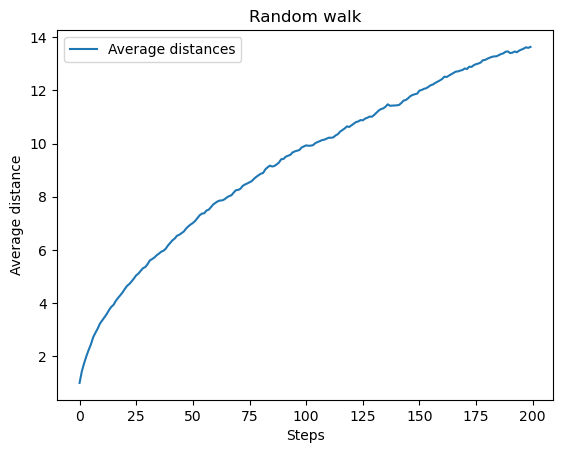

In [11]:
walkers = npr.choice(a=[-1,+1],size=(1000,200)) ## steps 1 and 2
print(np.shape(walkers))
print(walkers,'\n')
dist = np.cumsum(walkers,axis=1) ## step 3
print(np.shape(dist))
print(dist,'\n')
dist2 = np.square(dist)
print(dist2,'\n')
mean = np.mean(dist2,axis=0)
print(np.shape(mean))
print(mean,'\n')
sqr = np.sqrt(mean)

## Plot: 
plt.plot(range(0,200),sqr,label='Average distances')

plt.xlabel('Steps')
plt.ylabel('Average distance')
plt.title('Random walk')

plt.legend()


4.9) 

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [12]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2024-01-20 17:20:36--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2024-01-20 17:20:36--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8656a7339e674aac2d44aa2761.dl.dropboxusercontent.com/cd/0/inline/CLshr89rDa1FfsoW05sinDdNxWs5TGXKzdf3kfmMSvAsrgEX-GIH192BuEoT3dGzU3RyFOkx9AhHW-rKPWo35WRr61dWaCdTa_6R1t5buGEof763LsWfop8ae5Uqh1QMI_A/file# [following]
--2024-01-20 17:20:36--  https://uc8656a7339e674aac2d44aa2761.dl.dropboxusercontent.com/cd/0/inline/CLshr89rDa1FfsoW05sinDdNxWs5TGXKzdf3kfmMSvAsrgEX-GIH192BuEoT3dGzU3RyFOkx9AhHW-rKPWo35WRr61dWaCdTa_6R1t5buGEof76

[[ 1900 30000  4000 48300]
 [ 1901 47200  6100 48200]
 [ 1902 70200  9800 41500]
 [ 1903 77400 35200 38200]
 [ 1904 36300 59400 40600]
 [ 1905 20600 41700 39800]
 [ 1906 18100 19000 38600]
 [ 1907 21400 13000 42300]
 [ 1908 22000  8300 44500]
 [ 1909 25400  9100 42100]
 [ 1910 27100  7400 46000]
 [ 1911 40300  8000 46800]
 [ 1912 57000 12300 43800]
 [ 1913 76600 19500 40900]
 [ 1914 52300 45700 39400]
 [ 1915 19500 51100 39000]
 [ 1916 11200 29700 36700]
 [ 1917  7600 15800 41800]
 [ 1918 14600  9700 43300]
 [ 1919 16200 10100 41300]
 [ 1920 24700  8600 47300]]
[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920]


Mean: 

Hares: 34080.95238095238 

Lynxs 20166.666666666668 

Carrots: 42400.0 



Standard deviations: 

Hares: 20897.906458089667 

Lynxs 16254.591536908763 

Carrots: 3322.5062255844787 



Correlation coefficient: 

Hares: -0.38917662062641645 

Lynxs -0.02544805962502994 

Carrots: -0.1363332130403686 



P-values: 

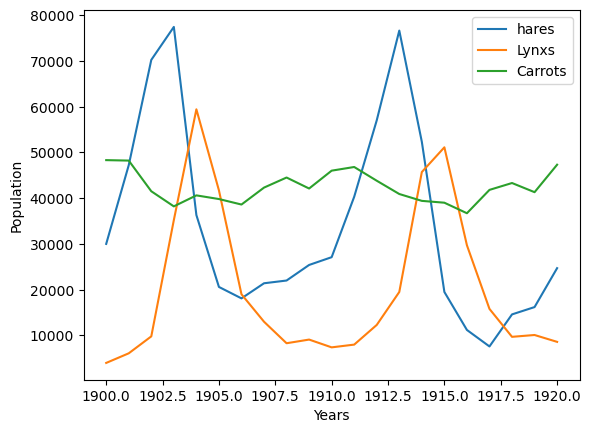

In [25]:
import csv
from io import StringIO
file = 'populations.txt'
data = np.loadtxt(file).astype(int)
print((data))
year = data[:,0]
print(year)
hares = data[:,1]
Lynxs = data[:,2]
Carrots = data[:,3]
plt.plot(year,hares,label='hares')
plt.plot(year,Lynxs,label='Lynxs')
plt.plot(year,Carrots,label='Carrots')
plt.xlabel('Years')
plt.ylabel('Population')
plt.legend()
plt.show

# Satistics:
import scipy.stats as sp

corrh,p_valueh = sp.pearsonr(year,hares)
corrl,p_valuel = sp.pearsonr(year,Lynxs)
corrc,p_valuec = sp.pearsonr(year,Carrots)
print('\n')
print("Mean:",'\n')
print("Hares:",np.mean(hares),'\n')
print("Lynxs",np.mean(Lynxs),'\n')
print("Carrots:",np.mean(Carrots),'\n')
print('\n')
print("Standard deviations:",'\n')
print("Hares:",np.std(hares),'\n')
print("Lynxs",np.std(Lynxs),'\n')
print("Carrots:",np.std(Carrots),'\n')
print('\n')
print("Correlation coefficient:",'\n')
print("Hares:",corrh,'\n')
print("Lynxs",corrl,'\n')
print("Carrots:",corrc,'\n')
print('\n')
print("P-values:",'\n')
print("Hares:",p_valueh,'\n')
print("Lynxss",p_valuel,'\n')
print("Carrots:",p_valuec,'\n')

# Which species has thw highest population each year:
data_noyears = data[:,1:]
for i in range(np.shape(data)[0]):
    j = np.argmax(data_noyears[i],axis=0)
    if j == 0:
        print(data[i,0],": Hares",'\n')
    elif j == 1:
       print(data[i,0],": Lynxss",'\n')
    elif j == 2:
        print(data[i,0],": Carrots",'\n')
    

**Topic 5 - OSEMN**

5.4) 

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [27]:
import csv
file = 'credit_card.dat'
card = []
with open(file= file) as f:
    for line in f:
        cardnum = ''
        for i in [i*6 for i in range(int((len(line)-4)/6))]: ## 4 bits per line are just for padding
            y = line[i:i+6]
            cardnum += chr(int(y,base=2))
        if cardnum == '': # to remove any cases in which cardnum is empty
            continue
        card.append(cardnum)
f.close()
print(card)

['7648 5673 3775 2271', '3257 8247 3354 2266', '2722 0001 4011 6652', '0661 3063 3742 3150', '0432 1608 1462 4742', '5827 2027 8785 7303', '5774 8528 2087 1117', '8140 1210 6352 2845', '5764 1133 7301 7100', '6456 1737 4126 6726', '1228 8631 7382 0000', '7051 0160 5374 3166', '0618 3587 1630 6376', '1545 5454 7444 5636', '6735 3116 3202 6834', '7287 5011 1547 8413', '7033 2607 3328 4200', '2568 5244 1874 5024', '1684 2253 7570 7118', '0672 2576 0575 6631', '6332 8353 8787 1340', '1813 3361 1175 4211', '2477 6450 8840 2368', '5512 3505 2563 1326', '3083 7882 0621 0025', '4521 5148 8045 0334', '7563 3654 8713 5787', '8324 2664 0476 5561', '0565 2504 7168 3510', '5107 5507 1767 0738', '2462 1821 2448 1443', '2788 0638 6861 6554', '5851 5873 5474 0547', '0670 1004 4013 2655', '5874 5506 3048 0806', '2805 5401 8462 1260', '5083 8406 6310 1862', '1076 1445 3013 2266', '8440 4804 4844 5277', '4758 6141 0686 1387', '7586 0675 0315 2568', '2544 1258 7432 5165', '3474 5023 4434 5626', '1410 0270

**Topic 6 - Pandas**

## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [29]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2024-01-20 18:00:00--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2024-01-20 18:00:00--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd0a12f125edd32363d0ce84f0.dl.dropboxusercontent.com/cd/0/inline/CLvosTJ0Bsk8eXxXfeXQvobxeiR9H5h2XWoGQOqNZBhaP5bWrX0ucH1LNX0Ob-POMsu74a1cu_r2MKMFprLHsmRrmWYsRsDuQUDNXisuOC1ceJOL_RoXsvWNTIYOkeRsCxY/file# [following]
--2024-01-20 18:00:01--  https://ucfd0a12f125edd32363d0ce84f0.dl.dropboxusercontent.com/cd/0/inline/CLvosTJ0Bsk8eXxXfeXQvobxeiR9H5h2XWoGQOqNZBhaP5bWrX0ucH1LNX0Ob-POMsu74a1cu_r2MKMFprLHsmRrmWYsRsDuQUDNXisuOC1ceJO

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [35]:
# 1:
import numpy as np
import pandas as pd

file = 'data_000637.txt'
N = 15000
df = pd.read_csv(file[:N])
df.head()
# df.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [36]:
#2: 
x = df.BX_COUNTER/df.ORBIT_CNT
x.head()

0    6.135635e-07
1    6.135635e-07
2    6.598263e-07
3    6.611185e-07
4    7.133257e-07
dtype: float64

In [37]:
# 3:
ORBIT_TIME = x*25 ## a unit of BX_COUNTER corresponds to 25 ns
BX_TIME = df.BX_COUNTER*25 # same
TDC_TIME = df.TDC_MEAS*(25/30) ## 25/30 ns for TDC
print(ORBIT_TIME.head())
print(BX_TIME.head())
print(TDC_TIME.head())

0    0.000015
1    0.000015
2    0.000016
3    0.000017
4    0.000018
dtype: float64
0    59350
1    59350
2    63825
3    63950
4    69000
Name: BX_COUNTER, dtype: int64
0    21.666667
1    22.500000
2    23.333333
3    15.833333
4    20.833333
Name: TDC_MEAS, dtype: float64


In [39]:
# 4:
df['Time in ns'] = ORBIT_TIME+BX_TIME+TDC_TIME
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,1,0,123,3869200167,2374,26,59371.666682
1,1,0,124,3869200167,2374,27,59372.500015
2,1,0,63,3869200167,2553,28,63848.333350
3,1,0,64,3869200167,2558,19,63965.833350
4,1,0,64,3869200167,2760,25,69020.833351
